<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/randomforest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/breast_cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
data.duplicated().sum()


np.int64(0)

In [ ]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df = data.drop(['Unnamed: 32','id'],axis=1)

In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(455, 30)
(455,)
(114, 30)
(114,)


<Axes: >

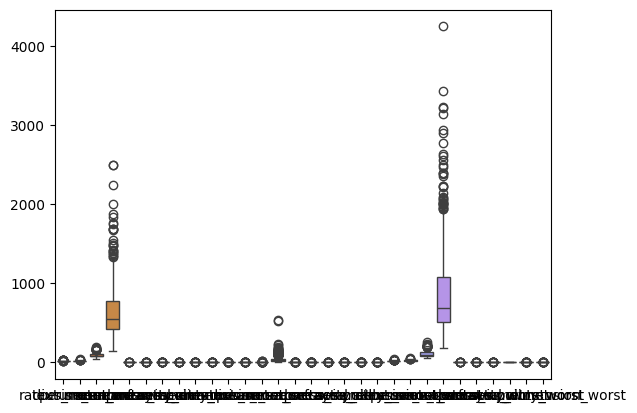

In [ ]:
sns.boxplot(data=df)

In [ ]:
from scipy import stats
z_score = np.abs(stats.zscore(x_train))
x_train = x_train[(z_score < 3).all(axis=1)]
print(z_score)

[[1.08980477 1.73966126 1.08529373 ... 0.7456873  1.35149583 0.13559105]
 [0.81296689 0.82151517 0.82100596 ... 0.30264591 0.27933134 0.92164202]
 [0.52193219 0.15712047 0.54834471 ... 0.3528194  0.69293533 0.12411602]
 ...
 [0.20210535 0.44893304 0.08123586 ... 1.27639031 0.76435225 1.41506845]
 [0.09208004 0.28059839 0.12414991 ... 1.55169058 0.83977653 1.97389138]
 [0.54677661 0.51509064 0.60329564 ... 0.50049987 0.23928375 0.83519676]]


<Axes: >

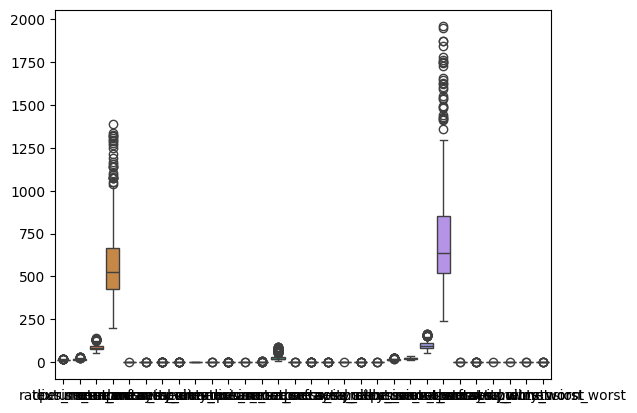

In [ ]:
sns.boxplot(data=x_train)

<Axes: ylabel='diagnosis'>

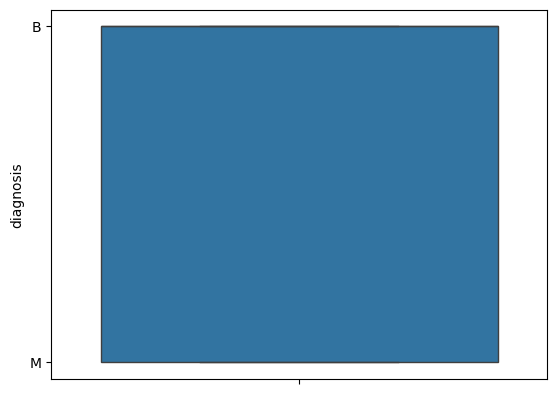

In [ ]:
sns.boxplot(data=y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
print(y_train[:5])
print(y_test[:5])

[0 1 0 0 0]
[0 1 1 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[0 1 1 0 0]
[0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



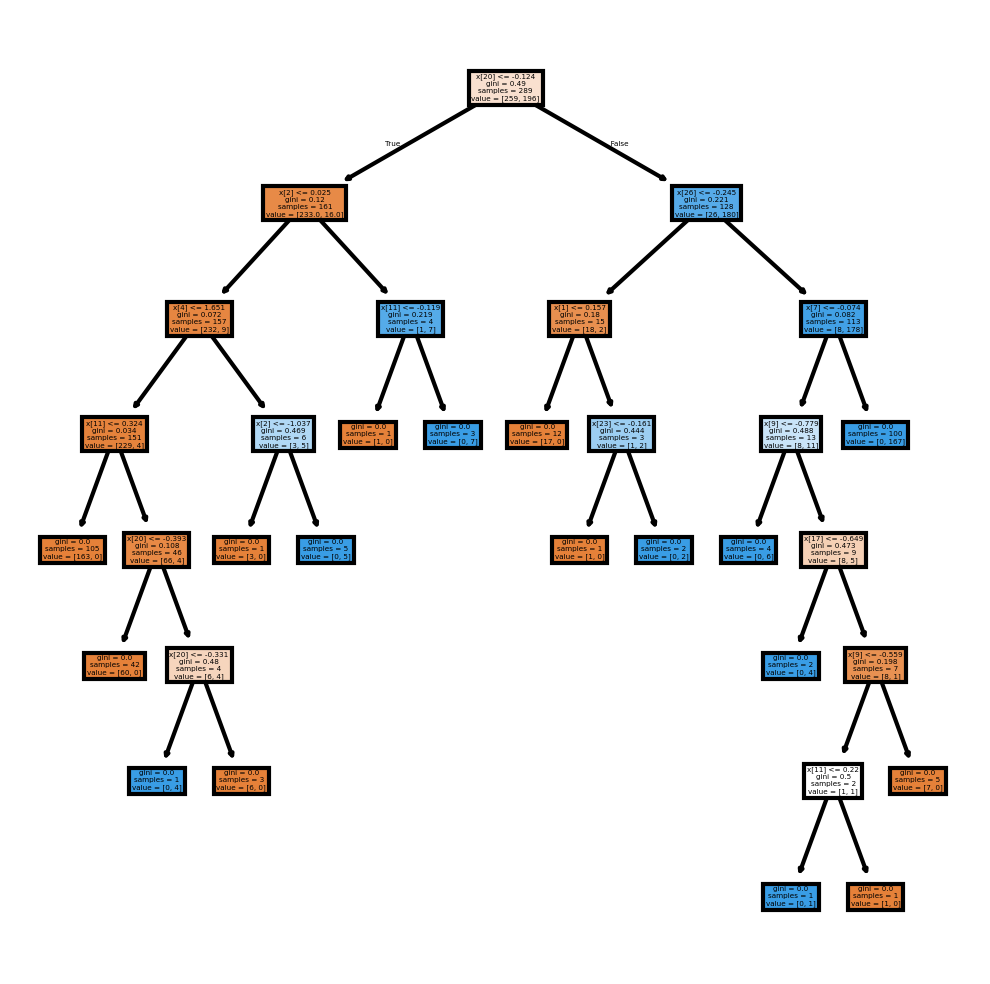

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model.estimators_[0],
               filled = True);
plt.show()

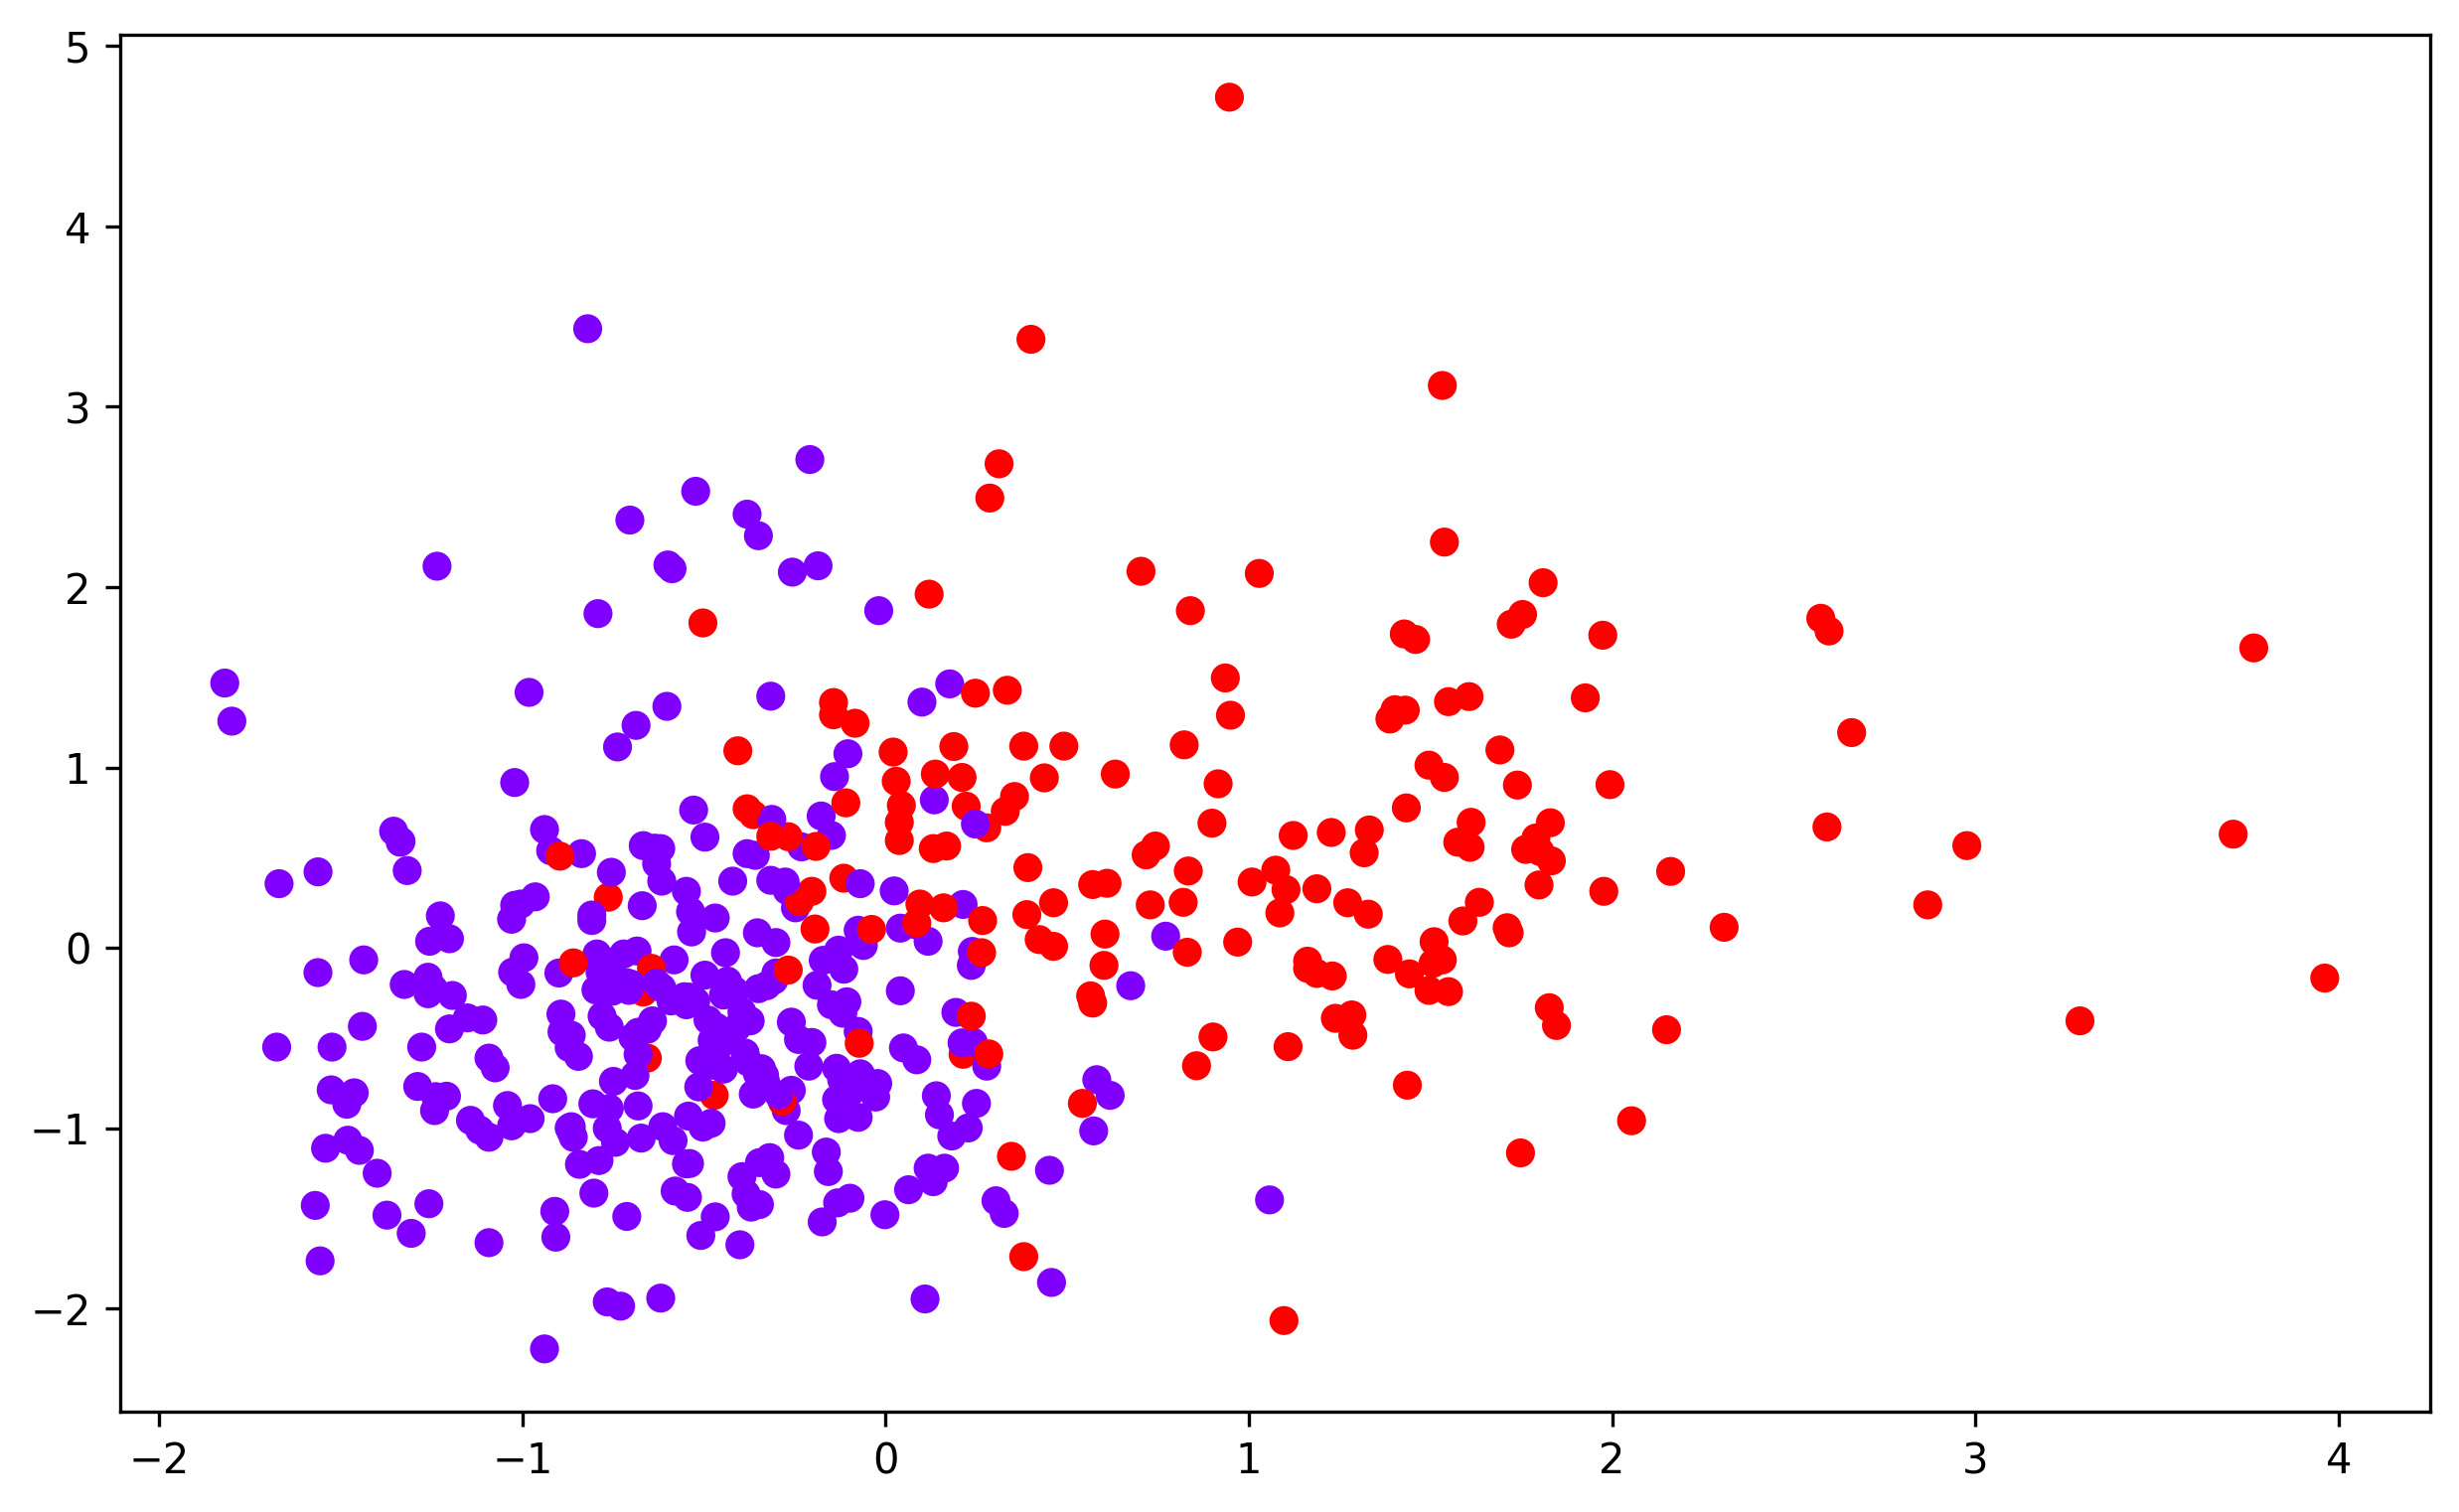

In [ ]:
figure = plt.figure(figsize=(10,6),dpi=300)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='rainbow')
plt.show()